In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_10_20.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_10_20.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_10_20.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_10_20.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [7]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_10_20.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  3836256


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_10_20.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_10_20.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_10_20.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2217038
Cascade length:  4082
New Orders left:  2212956
making new cascade


OG Orders left:  2212956
Cascade length:  2112
New Orders left:  2210844
making new cascade


OG Orders left:  2210844
Cascade length:  4045
New Orders left:  2206799
making new cascade


OG Orders left:  2206799
Cascade length:  5079
New Orders left:  2201720
making new cascade


OG Orders left:  2201720
Cascade length:  4831
New Orders left:  2196889
making new cascade


OG Orders left:  2196889
Cascade length:  3216
New Orders left:  2193673
making new cascade


OG Orders left:  2193673
Cascade length:  3418
New Orders left:  2190255
making new cascade


OG Orders left:  2190255
Cascade length:  4012
New Orders left:  2186243
making new cascade


OG Orders left:  2186243
Cascade length:  4104
New Orders left:  2182139
making new cascade


OG Orders left:  2182139
Cascade length:  3358
New Orders left:  2178781
making new cascade


OG Orders left:  2178781
Cascade length:  3264
New Orders le

Cascade length:  2800
New Orders left:  1985297
making new cascade


OG Orders left:  1985297
Cascade length:  2419
New Orders left:  1982878
making new cascade


OG Orders left:  1982878
Cascade length:  1873
New Orders left:  1981005
making new cascade


OG Orders left:  1981005
Cascade length:  2666
New Orders left:  1978339
making new cascade


OG Orders left:  1978339
Cascade length:  2187
New Orders left:  1976152
making new cascade


OG Orders left:  1976152
Cascade length:  334
New Orders left:  1975818
making new cascade


OG Orders left:  1975818
Cascade length:  2075
New Orders left:  1973743
making new cascade


OG Orders left:  1973743
Cascade length:  876
New Orders left:  1972867
making new cascade


OG Orders left:  1972867
Cascade length:  2230
New Orders left:  1970637
making new cascade


OG Orders left:  1970637
Cascade length:  1496
New Orders left:  1969141
making new cascade


OG Orders left:  1969141
Cascade length:  2329
New Orders left:  1966812
making new cas

Cascade length:  1521
New Orders left:  1841381
making new cascade


OG Orders left:  1841381
Cascade length:  1686
New Orders left:  1839695
making new cascade


OG Orders left:  1839695
Cascade length:  1465
New Orders left:  1838230
making new cascade


OG Orders left:  1838230
Cascade length:  1055
New Orders left:  1837175
making new cascade


OG Orders left:  1837175
Cascade length:  1924
New Orders left:  1835251
making new cascade


OG Orders left:  1835251
Cascade length:  1438
New Orders left:  1833813
making new cascade


OG Orders left:  1833813
Cascade length:  1725
New Orders left:  1832088
making new cascade


OG Orders left:  1832088
Cascade length:  1737
New Orders left:  1830351
making new cascade


OG Orders left:  1830351
Cascade length:  1565
New Orders left:  1828786
making new cascade


OG Orders left:  1828786
Cascade length:  1963
New Orders left:  1826823
making new cascade


OG Orders left:  1826823
Cascade length:  719
New Orders left:  1826104
making new ca

Cascade length:  2003
New Orders left:  1688344
making new cascade


OG Orders left:  1688344
Cascade length:  2474
New Orders left:  1685870
making new cascade


OG Orders left:  1685870
Cascade length:  2121
New Orders left:  1683749
making new cascade


OG Orders left:  1683749
Cascade length:  2162
New Orders left:  1681587
making new cascade


OG Orders left:  1681587
Cascade length:  1916
New Orders left:  1679671
making new cascade


OG Orders left:  1679671
Cascade length:  2300
New Orders left:  1677371
making new cascade


OG Orders left:  1677371
Cascade length:  2348
New Orders left:  1675023
making new cascade


OG Orders left:  1675023
Cascade length:  2611
New Orders left:  1672412
making new cascade


OG Orders left:  1672412
Cascade length:  2147
New Orders left:  1670265
making new cascade


OG Orders left:  1670265
Cascade length:  2454
New Orders left:  1667811
making new cascade


OG Orders left:  1667811
Cascade length:  2150
New Orders left:  1665661
making new c

Cascade length:  1901
New Orders left:  1516742
making new cascade


OG Orders left:  1516742
Cascade length:  3
New Orders left:  1516739
making new cascade


OG Orders left:  1516739
Cascade length:  1
New Orders left:  1516738
making new cascade


OG Orders left:  1516738
Cascade length:  1994
New Orders left:  1514744
making new cascade


OG Orders left:  1514744
Cascade length:  2130
New Orders left:  1512614
making new cascade


OG Orders left:  1512614
Cascade length:  1616
New Orders left:  1510998
making new cascade


OG Orders left:  1510998
Cascade length:  1829
New Orders left:  1509169
making new cascade


OG Orders left:  1509169
Cascade length:  1979
New Orders left:  1507190
making new cascade


OG Orders left:  1507190
Cascade length:  2729
New Orders left:  1504461
making new cascade


OG Orders left:  1504461
Cascade length:  1808
New Orders left:  1502653
making new cascade


OG Orders left:  1502653
Cascade length:  2085
New Orders left:  1500568
making new cascade

Cascade length:  2252
New Orders left:  1354584
making new cascade


OG Orders left:  1354584
Cascade length:  2023
New Orders left:  1352561
making new cascade


OG Orders left:  1352561
Cascade length:  2116
New Orders left:  1350445
making new cascade


OG Orders left:  1350445
Cascade length:  2
New Orders left:  1350443
making new cascade


OG Orders left:  1350443
Cascade length:  2501
New Orders left:  1347942
making new cascade


OG Orders left:  1347942
Cascade length:  1849
New Orders left:  1346093
making new cascade


OG Orders left:  1346093
Cascade length:  2751
New Orders left:  1343342
making new cascade


OG Orders left:  1343342
Cascade length:  2201
New Orders left:  1341141
making new cascade


OG Orders left:  1341141
Cascade length:  2977
New Orders left:  1338164
making new cascade


OG Orders left:  1338164
Cascade length:  2235
New Orders left:  1335929
making new cascade


OG Orders left:  1335929
Cascade length:  1734
New Orders left:  1334195
making new casc

Cascade length:  1764
New Orders left:  1191285
making new cascade


OG Orders left:  1191285
Cascade length:  3068
New Orders left:  1188217
making new cascade


OG Orders left:  1188217
Cascade length:  2020
New Orders left:  1186197
making new cascade


OG Orders left:  1186197
Cascade length:  1747
New Orders left:  1184450
making new cascade


OG Orders left:  1184450
Cascade length:  1607
New Orders left:  1182843
making new cascade


OG Orders left:  1182843
Cascade length:  2272
New Orders left:  1180571
making new cascade


OG Orders left:  1180571
Cascade length:  2187
New Orders left:  1178384
making new cascade


OG Orders left:  1178384
Cascade length:  1967
New Orders left:  1176417
making new cascade


OG Orders left:  1176417
Cascade length:  1360
New Orders left:  1175057
making new cascade


OG Orders left:  1175057
Cascade length:  1780
New Orders left:  1173277
making new cascade


OG Orders left:  1173277
Cascade length:  1712
New Orders left:  1171565
making new c

Cascade length:  2248
New Orders left:  1022543
making new cascade


OG Orders left:  1022543
Cascade length:  2079
New Orders left:  1020464
making new cascade


OG Orders left:  1020464
Cascade length:  2743
New Orders left:  1017721
making new cascade


OG Orders left:  1017721
Cascade length:  1818
New Orders left:  1015903
making new cascade


OG Orders left:  1015903
Cascade length:  1707
New Orders left:  1014196
making new cascade


OG Orders left:  1014196
Cascade length:  2088
New Orders left:  1012108
making new cascade


OG Orders left:  1012108
Cascade length:  1302
New Orders left:  1010806
making new cascade


OG Orders left:  1010806
Cascade length:  2177
New Orders left:  1008629
making new cascade


OG Orders left:  1008629
Cascade length:  1440
New Orders left:  1007189
making new cascade


OG Orders left:  1007189
Cascade length:  2114
New Orders left:  1005075
making new cascade


OG Orders left:  1005075
Cascade length:  2396
New Orders left:  1002679
making new c

Cascade length:  2200
New Orders left:  834194
making new cascade


OG Orders left:  834194
Cascade length:  1933
New Orders left:  832261
making new cascade


OG Orders left:  832261
Cascade length:  2468
New Orders left:  829793
making new cascade


OG Orders left:  829793
Cascade length:  3182
New Orders left:  826611
making new cascade


OG Orders left:  826611
Cascade length:  2542
New Orders left:  824069
making new cascade


OG Orders left:  824069
Cascade length:  2599
New Orders left:  821470
making new cascade


OG Orders left:  821470
Cascade length:  2065
New Orders left:  819405
making new cascade


OG Orders left:  819405
Cascade length:  1975
New Orders left:  817430
making new cascade


OG Orders left:  817430
Cascade length:  2556
New Orders left:  814874
making new cascade


OG Orders left:  814874
Cascade length:  1686
New Orders left:  813188
making new cascade


OG Orders left:  813188
Cascade length:  2628
New Orders left:  810560
making new cascade


OG Orders le

Cascade length:  1754
New Orders left:  641052
making new cascade


OG Orders left:  641052
Cascade length:  2963
New Orders left:  638089
making new cascade


OG Orders left:  638089
Cascade length:  2529
New Orders left:  635560
making new cascade


OG Orders left:  635560
Cascade length:  2775
New Orders left:  632785
making new cascade


OG Orders left:  632785
Cascade length:  2169
New Orders left:  630616
making new cascade


OG Orders left:  630616
Cascade length:  2365
New Orders left:  628251
making new cascade


OG Orders left:  628251
Cascade length:  1781
New Orders left:  626470
making new cascade


OG Orders left:  626470
Cascade length:  2843
New Orders left:  623627
making new cascade


OG Orders left:  623627
Cascade length:  2551
New Orders left:  621076
making new cascade


OG Orders left:  621076
Cascade length:  2828
New Orders left:  618248
making new cascade


OG Orders left:  618248
Cascade length:  2087
New Orders left:  616161
making new cascade


OG Orders le

Cascade length:  1721
New Orders left:  448822
making new cascade


OG Orders left:  448822
Cascade length:  2376
New Orders left:  446446
making new cascade


OG Orders left:  446446
Cascade length:  1945
New Orders left:  444501
making new cascade


OG Orders left:  444501
Cascade length:  2210
New Orders left:  442291
making new cascade


OG Orders left:  442291
Cascade length:  3053
New Orders left:  439238
making new cascade


OG Orders left:  439238
Cascade length:  2894
New Orders left:  436344
making new cascade


OG Orders left:  436344
Cascade length:  1905
New Orders left:  434439
making new cascade


OG Orders left:  434439
Cascade length:  1703
New Orders left:  432736
making new cascade


OG Orders left:  432736
Cascade length:  1688
New Orders left:  431048
making new cascade


OG Orders left:  431048
Cascade length:  3983
New Orders left:  427065
making new cascade


OG Orders left:  427065
Cascade length:  3068
New Orders left:  423997
making new cascade


OG Orders le

Cascade length:  1525
New Orders left:  293574
making new cascade


OG Orders left:  293574
Cascade length:  1237
New Orders left:  292337
making new cascade


OG Orders left:  292337
Cascade length:  2678
New Orders left:  289659
making new cascade


OG Orders left:  289659
Cascade length:  3434
New Orders left:  286225
making new cascade


OG Orders left:  286225
Cascade length:  1348
New Orders left:  284877
making new cascade


OG Orders left:  284877
Cascade length:  1
New Orders left:  284876
making new cascade


OG Orders left:  284876
Cascade length:  1793
New Orders left:  283083
making new cascade


OG Orders left:  283083
Cascade length:  2390
New Orders left:  280693
making new cascade


OG Orders left:  280693
Cascade length:  1
New Orders left:  280692
making new cascade


OG Orders left:  280692
Cascade length:  2961
New Orders left:  277731
making new cascade


OG Orders left:  277731
Cascade length:  1172
New Orders left:  276559
making new cascade


OG Orders left:  2

Cascade length:  1963
New Orders left:  101794
making new cascade


OG Orders left:  101794
Cascade length:  1772
New Orders left:  100022
making new cascade


OG Orders left:  100022
Cascade length:  2491
New Orders left:  97531
making new cascade


OG Orders left:  97531
Cascade length:  2572
New Orders left:  94959
making new cascade


OG Orders left:  94959
Cascade length:  2009
New Orders left:  92950
making new cascade


OG Orders left:  92950
Cascade length:  2191
New Orders left:  90759
making new cascade


OG Orders left:  90759
Cascade length:  2217
New Orders left:  88542
making new cascade


OG Orders left:  88542
Cascade length:  1905
New Orders left:  86637
making new cascade


OG Orders left:  86637
Cascade length:  1959
New Orders left:  84678
making new cascade


OG Orders left:  84678
Cascade length:  2076
New Orders left:  82602
making new cascade


OG Orders left:  82602
Cascade length:  1813
New Orders left:  80789
making new cascade


OG Orders left:  80789
Cascad

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [11]:
import numpy

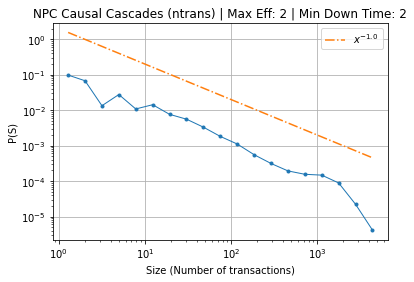

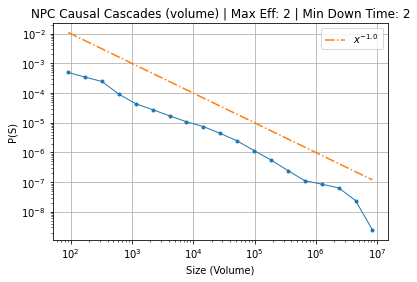

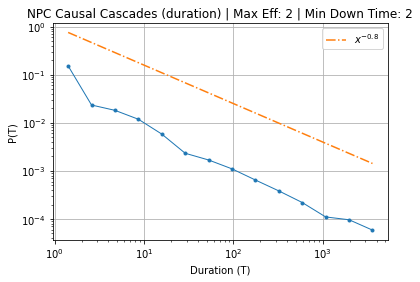

In [15]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

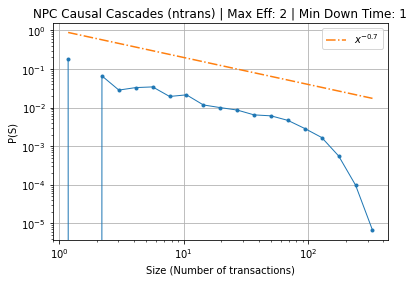

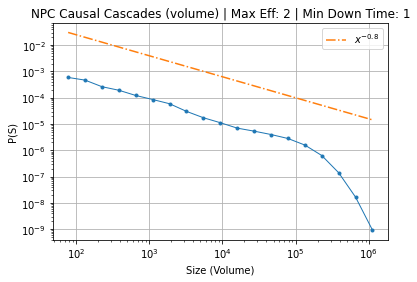

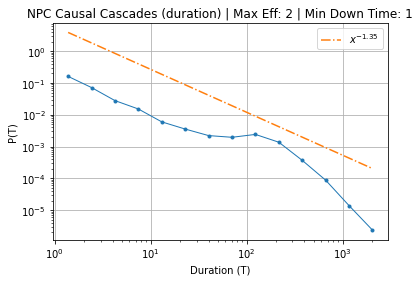

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

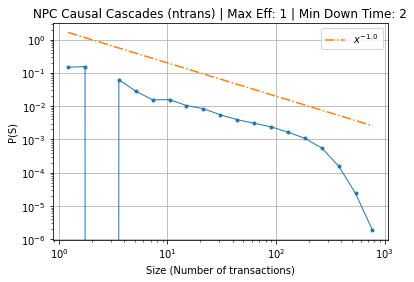

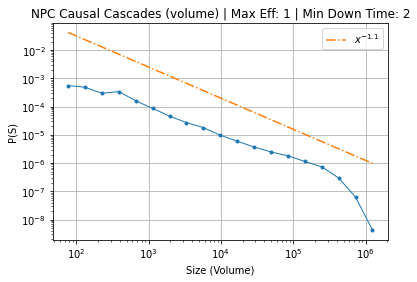

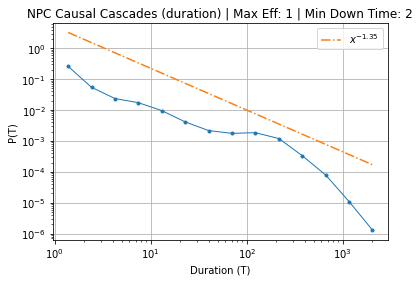

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

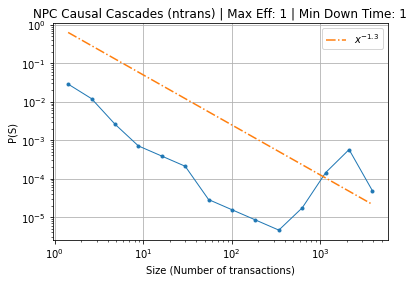

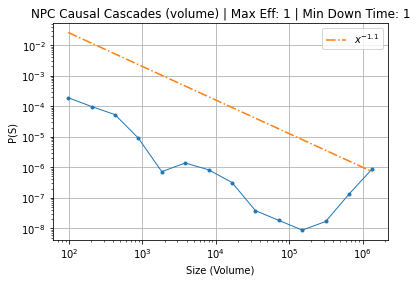

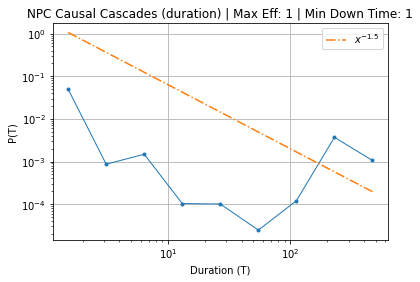

In [13]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.3), '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_10_20_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*4, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_10_20_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),10))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.5)*2, '-.', label= "$x^{-1.5}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_10_20_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [9]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
